# Avaliação Modulo II - Santander Coders 

## Table of coments 

1) Carregue os dados de um csv remoto, ex. csv do github, csv de uma base aberta qualquer ou API.

2) Crie uma api que filtre esses dados e retorne o json dos dados filtrados.

3) A partir dos dados filtrados você deve escolher uma variável quantitativa para agregar com um groupby e criar um csv e um json resposta, ambos devem ser persistidos.

4) A partir dos dados filtrados você deve escolher um gráfico para fazer como por exemplo fizemos as gorgetas dadas por sexo ou dia da semana. Crie uma figura png ou jpeg resposta.

5) Coloque sua resposta em um projeto novo no git e envie por e-mail.

### Banco de dados utilizado
caso_full: https://github.com/turicas/covid19-br/blob/master/api.md#caso_full

Movito da autenticação: https://blog.brasil.io/2020/10/31/nossa-api-sera-obrigatoriamente-autenticada/

Realizando alguns imports

In [127]:
import json
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from brasil_io import BrasilIO
import numpy as np
import matplotlib.pyplot as plt

### 1) Carregue os dados de um csv remoto, ex. csv do github, csv de uma base aberta qualquer ou API

In [128]:
covid19 = COVID19()

Database Covid19 its ready!


### 2) Crie uma api que filtre esses dados e retorne o json dos dados filtrados.

In [106]:
covid19.get_raw_data()

,place_type,state,city,date,day_of_week,epidemiological_week,new_confirmed,new_deaths
0,city,AC,Rio Branco,2020-03-17,Tuesday,202012,3,0
1,state,AC,NaN,2020-03-17,Tuesday,202012,3,0
2,city,AC,Rio Branco,2020-03-18,Wednesday,202012,0,0
3,state,AC,NaN,2020-03-18,Wednesday,202012,0,0
4,city,AC,Rio Branco,2020-03-19,Thursday,202012,1,0
...,...,...,...,...,...,...,...,...
3151643,city,TO,Tupirama,2021-11-22,Monday,202147,0,0
3151644,city,TO,Tupiratins,2021-11-22,Monday,202147,0,0
3151645,city,TO,Wanderlândia,2021-11-22,Monday,202147,0,0
3151646,city,TO,Xambioá,2021-11-22,Monday,202147,0,0


### 3) A partir dos dados filtrados você deve escolher uma variável quantitativa para agregar com um groupby e criar um csv e um json resposta, ambos devem ser persistidos.

In [129]:
UF_id = 'PE'
city = "Recife"
dateInicial = '2020-10-1'
dateFinal = '2021-04-01'
modal_median = 14

database = covid19._filter_data(UF = UF_id, city = city, dateInicial = dateInicial , dateFinal = dateFinal, modal_median = modal_median)
database.head()

,city_ibge_code,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
epidemiological_week,,,,,,,,,,,,
202041,2611606.0,1653461.0,1645727.0,0,0,35261,2132.55710,0.0687,2423,213,102,1
202042,18281242.0,11574227.0,11520089.0,0,3,247725,14982.21004,0.4794,16969,1519,178,2
202043,18281242.0,11574227.0,11520089.0,0,0,251361,15202.11242,0.4745,17035,1568,715,14
202044,18281242.0,11574227.0,11520089.0,0,0,254945,15418.86988,0.4704,17129,1617,576,19
202045,18281242.0,11574227.0,11520089.0,0,0,257908,15598.06974,0.4687,17271,1666,338,21


Text(0.5, 1.0, 'confirmed cases by covid 19 from 2020-10-1 to 2021-04-01 ')

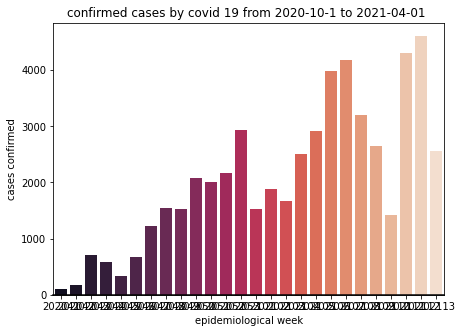

In [131]:
df = database.reset_index()

# plt.barplot(x=df['epidemiological_week'],  y = df['new_confirmed'])
# g. y = 'new_deaths')


fig , axis = plt.subplots(figsize = (7, 5))
sns.barplot(x=df['epidemiological_week'], y=df['new_confirmed'], palette="rocket", ax=axis)
axis.axhline(0, color="k", clip_on=False)
axis.set_ylabel("cases confirmed")
axis.set_xlabel("epidemiological week")
axis.set_title(f"confirmed cases by covid 19 from {dateInicial} to {dateFinal} ")

# a

# # Using set_dashes() to modify dashing of an existing line
# line1, = ax.plot(df['epidemiological_week'], df['new_confirmed'], label='Using set_dashes()')
# line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

# # Using plot(..., dashes=...) to set the dashing when creating a line
# # line2, = ax.plot(df['epidemiological_week'],df['new_deaths'], dashes=[6, 2], label='Using the dashes parameter')

# ax.legend()
# plt.show()


### 4) A partir dos dados filtrados você deve escolher um gráfico para fazer como por exemplo fizemos as gorgetas dadas por sexo ou dia da semana. Crie uma figura png ou jpeg resposta.

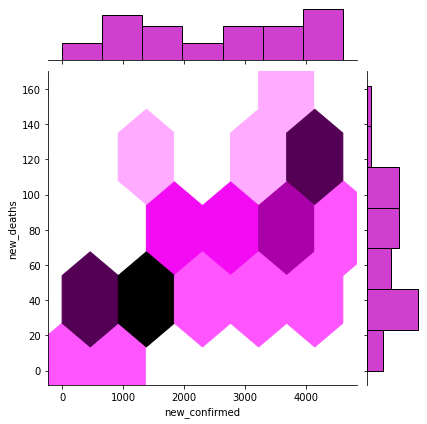

In [90]:
covid19._save(database)
covid19._plot_graph(database)

### 5) Coloque sua resposta em um projeto novo no git e envie por e-mail

link do github: 

#### Arquivo covid19.py

In [1]:
%%writefile covid19.py
import json
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from brasil_io import BrasilIO
import os

class COVID19:
    
    """
    Codigo utilizado para o donwload do dataset de casos sobre a covid-19 disponível no site Brasil IO.
    """
     
    _dias_da_semana = ['Segunda-Feira',
                            'Terça-Feira',
                            'Quarta-Feira',
                            'Quinta-Feira',
                            'Sexta-Feira',
                            'Sábado',
                            'Domingo']
    
    _raw_data_selected = ['place_type',
                          'state',
                          'city',
                          'date',
                          'day_of_week',
                          'epidemiological_week',
                          'new_confirmed',
                          'new_deaths']

    def __init__(self) -> None:
        
        self._dataset_slug = 'covid19'
        self._table_name = 'caso_full'
        self._key = 'f052cad482a37a956728c14796ce20bb25258f73'
        
        exist_file = os.path.isfile(f'{self._dataset_slug}_{self._table_name}.csv')
        exist_zip = os.path.isfile(f'{self._dataset_slug}_{self._table_name}.csv.gz')
         
        if not (exist_file or exist_zip):
            
            print('base de dados nao carregada')
            api = BrasilIO(self._key)
            response = api.download(self._dataset_slug, self._table_name)
            with open(f"{self._dataset_slug}_{self._table_name}.csv.gz", mode="wb") as fobj:
                fobj.write(response.read())
        
        if exist_file:
        
            self.database = pd.read_csv(f'{self._dataset_slug}_{self._table_name}.csv')
        
        else:
            
            self.database = pd.read_csv(f'{self._dataset_slug}_{self._table_name}.csv.gz')
        
        self._cria_dia_da_semana()
        print("Database Covid19 its ready!")
           
        
    def _get_database(self) -> pd.DataFrame:
         return self.database[self._raw_data_selected]
        
    def _get_city(self, UF: str = 'PE', city: str = 'Recife', dateInicial: str = '2021-01-24' , dateFinal: str = '2021-11-01' ) -> pd.DataFrame:
        
        self.UF = UF
        self.city = city
       
        dates = self.database['date'].between(dateInicial,dateFinal)
        
        this_state = self.database['state'] == self.UF
        only_cities = self.database['place_type'] == 'city'
        this_city = self.database['city'] == self.city
        
        df_this_city = self.database[dates & this_city & only_cities & this_state]
        
        return df_this_city
    
    def data_analysis(self, UF: str = "PE", city: str = "Recife", dateInicial: str = '2021-01-24' , dateFinal: str = '2021-11-01', modal_median: int = 14) -> pd.DataFrame:
        
        df = self._filter_data(UF, city, dataInicial, dateFinal, modal_median)
            
        # salvando dados 
        self._save(df)
        
        # plot dados
        self._plot_graph(df, dateInicial, dateFinal)
        
        return df
    
    def _filter_data(self, UF: str = "PE", city: str = "Recife", dateInicial: str = '2021-01-24' , dateFinal: str = '2021-11-01', modal_median: int = 14) -> pd.DataFrame:
        
        df_covid_city = self._get_city(UF, city, dateInicial, dateFinal) # recupera a cidade solicitada 
        
        # cria uma média modal para casos confirmados
        df1 = df_covid_city['new_confirmed'].rolling(window=modal_median).mean() 
        df_covid_city.assign(Mm_new_confirmed = df1) 
        df2 = df_covid_city['new_deaths'].rolling(window=modal_median).mean()
        df_covid_city.assign(Mm_new_deaths = df2) 
        
        # agrupando os dados por semana
        df = df_covid_city.fillna(10)
        df = df.groupby('epidemiological_week').sum()
        
        return df
        
        
        
    def _save(self, df: pd.DataFrame) -> None:
        nomeArquivo = f"filtered_data_covid19_{self.UF}_{self.city}"
        df.to_csv(nomeArquivo + ".csv")
        json = df.to_json(orient = 'split')
        
        with open(nomeArquivo + ".json", 'w') as arquivo:
            arquivo.write(json)
    
    def _plot_graph(self, df: pd.DataFrame, dateInicial: str = '2021-01-24' , dateFinal: str = '2021-11-01') -> None: 
        
        df = df.reset_index()
        fig , axis = plt.subplots(figsize = (7, 5))
        g = sns.barplot(x=df['epidemiological_week'], y=df['new_confirmed'], palette="rocket", ax=axis)
        axis.axhline(0, color="k", clip_on=False)
        axis.set_ylabel("cases confirmed")
        axis.set_xlabel("epidemiological week")
        axis.set_title(f"confirmed cases by covid 19 from {dateInicial} to {dateFinal}")
        g.savefig("Figure.png")
    
    def _cria_dia_da_semana(self) -> None:
        self.database['day_of_week'] = self.database['date'].apply(lambda x: pd.Timestamp(x)).apply(lambda x: x.day_name())
    
    def get_raw_data(self) -> pd.DataFrame:
        return self._get_database()

Overwriting covid19.py


#### Arquivo api_covid19.py

In [133]:
%%writefile api_covid19.py
from flask import Flask
from flask_restful import reqparse, abort,Resource, Api
from covid19 import COVID19

app = Flask(__name__)
api = Api(app)

# cria a classe a ser trabalhada

covid19 = COVID19() # muito demorado pois você baixa, e extrai um arquivo rar!!!

parser = reqparse.RequestParser()
parser.add_argument('task')
raw_data = covid19.get_raw_data()


class Raw_data_covid19(Resource):
    def get(self):
        return raw_data.head(10).to_json(orient="split")

    
class Filter_raw_data_covid19(Resource):
    def get(self, column_id):
        return raw_data[column_id].head(10).to_json(orient="split"), 201
        
class Filter_data_covid19(Resource):

    def get(self, UF_id, city_id):
        return covid19.data_analysis(UF_id, city_id).head(10).to_json(orient='split')
 
    
api.add_resource(Raw_data_covid19, '/raw_data')
api.add_resource(Filter_raw_data_covid19, '/raw_data/<column_id>')
api.add_resource(Filter_data_covid19, '/covid19_filter_data/<UF_id>/<city_id>')

if __name__ == '__main__':
    app.run(debug=True)

Overwriting api_covid19.py
